## Insertion sort usando permutaciones aleatorias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def random_perm(n):
    v = [i for i in range(n)]
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        v[i], v[j] = v[j], v[i]
    return v

In [3]:
def insertion_sort(arr):
    """
    Retorna una tupla con la cantidad de instrucciones, comparaciones y swaps (intercambios)
    """
    ins = 0  # instrucciones
    comp = 0  # comparaciones
    swaps = 0  # swaps (intercambios)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        ins += 3    # i = ; key =; j = ;
        while j >= 0 and key < arr[j]:
            comp += 1  # key < arr[j];
            arr[j+1] = arr[j]   # Desplaza hacia la derecha el valor
            swaps += 1
            j -= 1
            ins += 3    # arr[j+1] =; j =; j >=;
        arr[j+1] = key; ins += 1
    return ins, comp, swaps

In [18]:
instructions = []   # Lista para manejar las instrucciones
comparisons = []    # Lista para manejar las comparaciones
swaps = []      # Lista para manejar los swaps
max = 11  # Cantidad maxima de permutaciones
runs = 50000   # Cantidad de veces que se ordenaran

In [19]:
for n in range(1, max):
    i_aux = []
    c_aux = []
    s_aux = []
    for _ in range(runs):
        p = random_perm(n)
        #print(p)
        i, c, s = insertion_sort(p)
        #print("i: {}, c: {}, s: {}".format(i, c, s))
        i_aux.append(i)
        c_aux.append(c)
        s_aux.append(s)

    instructions.append(i_aux)
    comparisons.append(c_aux)
    swaps.append(s_aux)

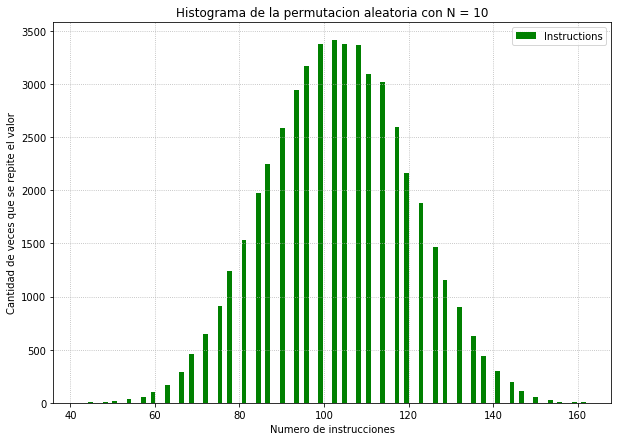

In [38]:
plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(instructions)
arr_hist = instructions[len_i-1]
plt.hist(arr_hist, bins='auto', color="g")
plt.grid(linestyle="dotted")
title = "Histograma de la permutacion aleatoria con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de instrucciones")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Instructions"])

plt.show()

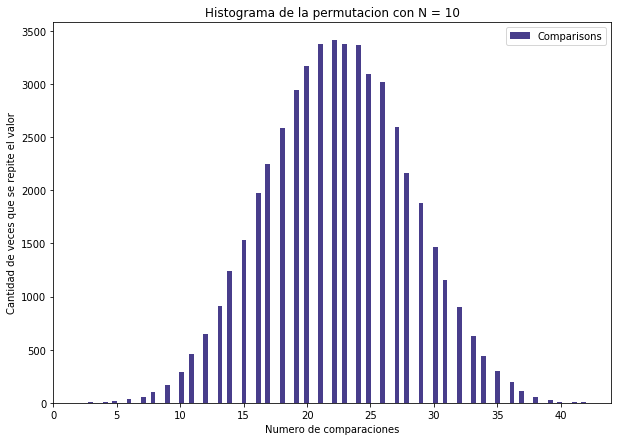

In [21]:
#plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(comparisons)
comp_hist = comparisons[len_i-1]
plt.hist(comp_hist, bins='auto', color="darkslateblue")
title = "Histograma de la permutacion con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de comparaciones")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Comparisons"])

plt.show()

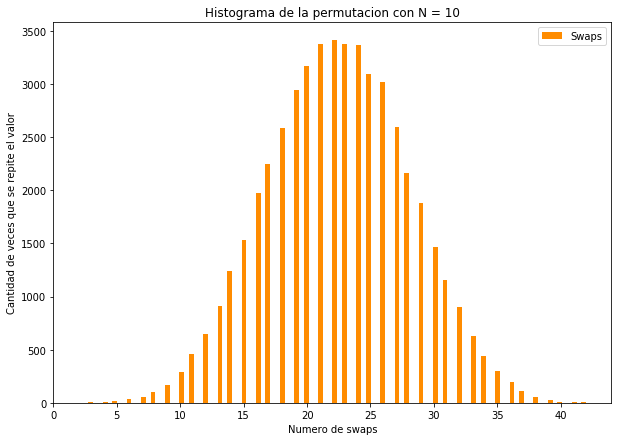

In [22]:
#plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(swaps)
swaps_hist = swaps[len_i-1]
plt.hist(comp_hist, bins='auto', color="darkorange")
title = "Histograma de la permutacion con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de swaps")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Swaps"])

plt.show()

In [23]:
def means(seq):
    """
    Retorna una lista con las medias de cada lista dentro de la secuencia
    """
    return [np.mean(s) for s in seq]

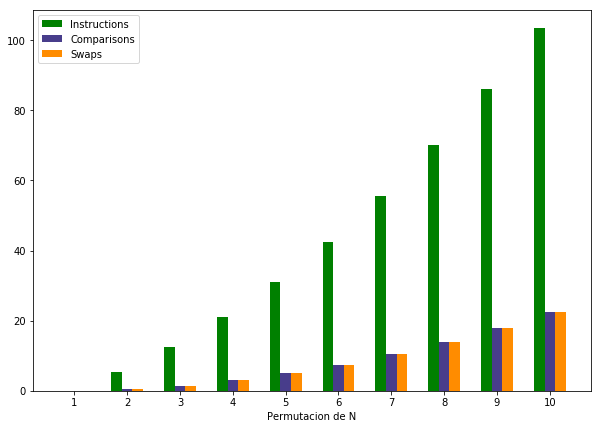

In [25]:
plt.rcParams['figure.figsize'] = 10,7 # width, height
fig = plt.figure()
ax = plt.subplot(111)
x_axe = np.arange(1, max)
w = 0.2     # width

ins_means = means(instructions)
ax.bar(x_axe, ins_means, w, color="g")

comp_means = means(comparisons)
ax.bar(x_axe+w, comp_means, w, color="darkslateblue")

swaps_means = means(swaps)
ax.bar(x_axe+2*w, swaps_means, w, color="darkorange")

ax.set_xticks(x_axe+w)
ax.set_xticklabels(x_axe)
ax.legend(["Instructions", "Comparisons", "Swaps"])
ax.set_xlabel("Permutacion de N")

"""print(ins_means)
print(comp_means)
print(swaps_means)"""

plt.show()